In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler,  Binarizer #평균이 0, 분산이1인 정규분포 형태로 반환 , Binarizer
from sklearn.linear_model import LogisticRegression 
import warnings 
warnings.filterwarnings('ignore')

In [19]:
diabetes = pd.read_csv('diabetes.csv')

In [20]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [21]:
#null값 확인 
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
# 호출한 지표들을 한꺼번에 계산하는 함수 정의
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도 : {:.4f}\n정밀도 : {:.4f}\n재현율 : {:.4f}\nF1:{:.4f}\nauc:{:.4f}'.format(accuracy, precision, recall,f1,auc))

In [38]:
X = diabetes.iloc[:,:-1]   #iloc[행,열]
y = diabetes.iloc[:,-1]
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 156,stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred,pred_proba)


오차행렬
[[88 12]
 [23 31]]
정확도 : 0.7727
정밀도 : 0.7209
재현율 : 0.5741
F1:0.6392
auc:0.7919


In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # x축을 threshold 값, y축을 정밀도, 재현율로 그리기
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0: thresholds_boundary], linestyle= '--', label='precision')
    plt.plot(thresholds, recalls[0: thresholds_boundary], label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()



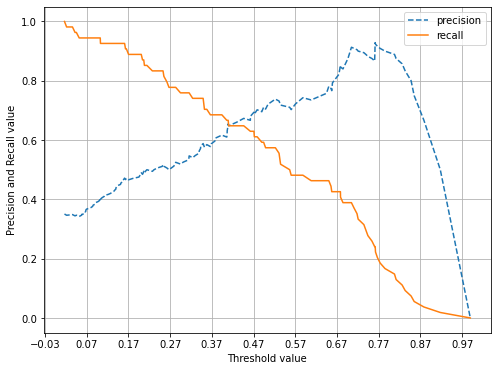

In [42]:
# 임계값별로 정밀도-재현율 출력
precision_recall_curve_plot(y_test,pred_proba)

In [43]:
#이상값 찾기 
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

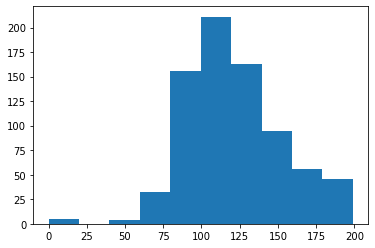

In [44]:
plt.hist(diabetes.Glucose)

In [45]:
# 0 값을 검사할 피처 명 리스트 
feature_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [51]:
# 전체 데이터 건수 
total_count = diabetes['Glucose'].count()

In [55]:
# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산 
for feature in feature_list:
    zero_count = diabetes[diabetes[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count,100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [61]:
# 0 값들을 우선 NaN 값으로 대체
diabetes[feature_list] = diabetes[feature_list].replace(0, np.nan)

# 위 5개 feature 에 대해 0값을 평균 값으로 대체
mean_features = diabetes[feature_list].mean()
diabetes[feature_list] = diabetes[feature_list].replace(np.nan, mean_features)

In [63]:
# 데이터 세트에 대해 피처 스케일링을 적용하여 변환하기(로지스틱 회귀의 경우, 숫자 데이터에 스케일링을 적용하는 것이 일반적으로 성능이 좋음)
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

# StandardScaler 클래스를 상용하여 데이터 세트에 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=156, stratify = y)

# 로지스틱 회귀로 학습, 예측, 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train,  y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred,pred_proba)

오차행렬
[[89 11]
 [21 33]]
정확도 : 0.7922
정밀도 : 0.7500
재현율 : 0.6111
F1:0.6735
auc:0.7919


In [72]:
# 평가지표를 조사하기 위한 새로운 함수 생성
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 iteration 하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [73]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


임계값:  0.3
오차행렬
[[68 32]
 [10 44]]
정확도 : 0.7273
정밀도 : 0.5789
재현율 : 0.8148
F1:0.6769
auc:0.8500

임계값:  0.33
오차행렬
[[74 26]
 [11 43]]
정확도 : 0.7597
정밀도 : 0.6232
재현율 : 0.7963
F1:0.6992
auc:0.8500

임계값:  0.36
오차행렬
[[75 25]
 [13 41]]
정확도 : 0.7532
정밀도 : 0.6212
재현율 : 0.7593
F1:0.6833
auc:0.8500

임계값:  0.39
오차행렬
[[82 18]
 [16 38]]
정확도 : 0.7792
정밀도 : 0.6786
재현율 : 0.7037
F1:0.6909
auc:0.8500

임계값:  0.42
오차행렬
[[85 15]
 [18 36]]
정확도 : 0.7857
정밀도 : 0.7059
재현율 : 0.6667
F1:0.6857
auc:0.8500

임계값:  0.45
오차행렬
[[86 14]
 [19 35]]
정확도 : 0.7857
정밀도 : 0.7143
재현율 : 0.6481
F1:0.6796
auc:0.8500

임계값:  0.48
오차행렬
[[88 12]
 [20 34]]
정확도 : 0.7922
정밀도 : 0.7391
재현율 : 0.6296
F1:0.6800
auc:0.8500

임계값:  0.5
오차행렬
[[89 11]
 [21 33]]
정확도 : 0.7922
정밀도 : 0.7500
재현율 : 0.6111
F1:0.6735
auc:0.8500


In [74]:
from sklearn.preprocessing import Binarizer

In [84]:
binarizer = Binarizer(threshold = 0.48)
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1))
get_clf_eval(y_test,pred_th_048,pred_proba[:, 1])

오차행렬
[[88 12]
 [20 34]]
정확도 : 0.7922
정밀도 : 0.7391
재현율 : 0.6296
F1:0.6800
auc:0.8500
